# Machine Learning portfolio project : Iris flower classification

In [3]:
#Importing Required Libraries

import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

In [39]:
#importing ML models from scikit learn package

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import svm

## Now it's time to get data on which I am going to perform analysis and applying machine learning for prediction

### Iris is flowers data set if you want to get more details about this dataset you can go throung wikipedia page of 
Wikipedia: https://en.wikipedia.org/wiki/Iris_flower_data_set ,
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"

In [7]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pandas.read_csv(url, names=names)

## Now it is time to perform some summarization on dataset so I can get the context about iris data set 

## Will cover these steps uder this section
    1.Dimension of Dataset
    2.Peek at the Data
    3.Statistical Summary
    4.Class Distribution 

### Dimesion of Dataset

In [8]:
dataset.shape

(150, 5)

#### 150 rows and 5 columns

### Peek at the data

In [11]:
print(dataset.head(20))

    sepal-length  sepal-width  petal-length  petal-width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13           4.3    

### Statistical Summary

In [14]:
print(dataset.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


### Class Distribution

In [20]:
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


#### There are three classes and same in number.

## Now it's time to perform some visualization so I can get the feel in graphical form and will operate accordingly

### Univariate Plots

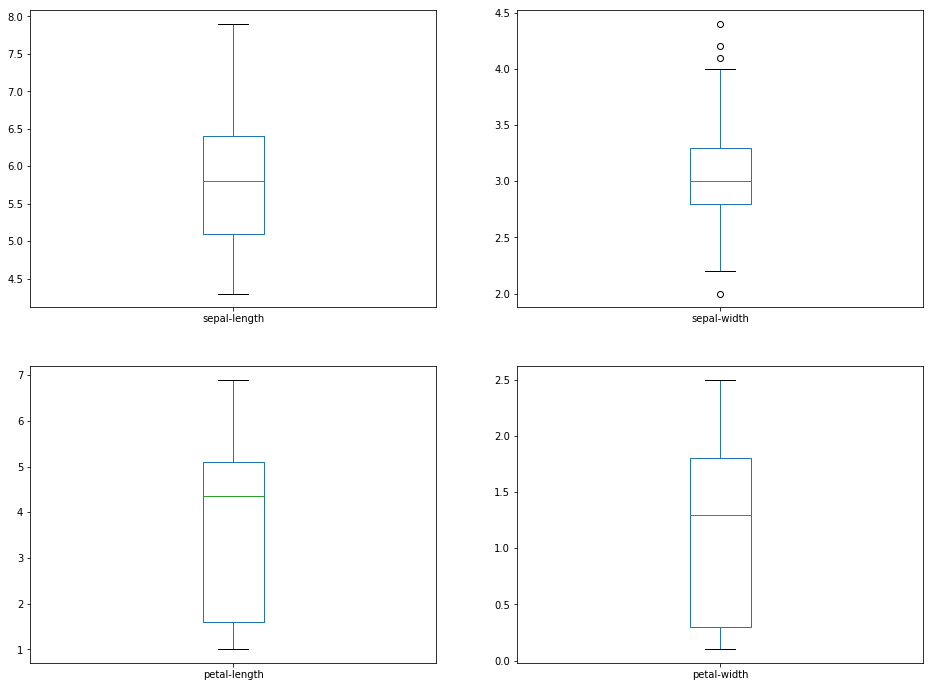

In [30]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False,figsize=(16,12))
plt.show()

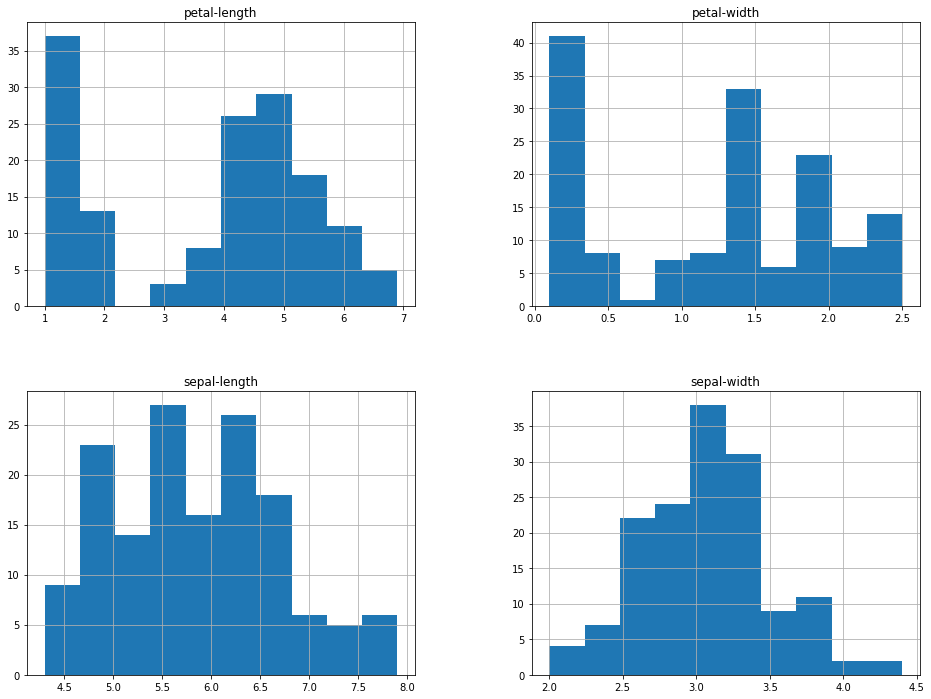

In [29]:
#histogram 
dataset.hist(figsize=(16,12))
plt.show()

### Multivariate Plots

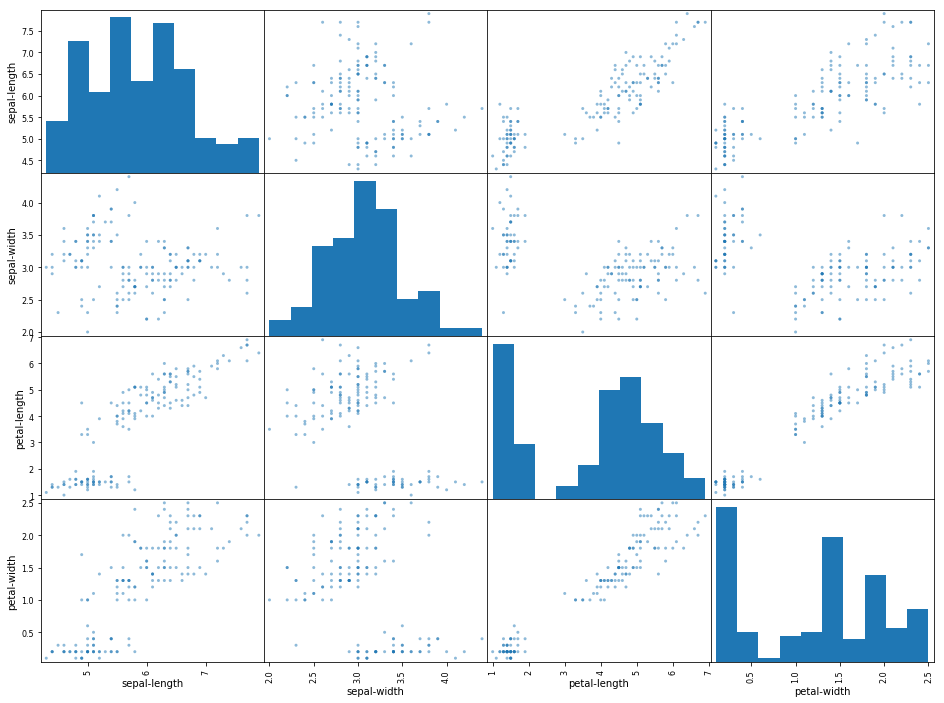

In [28]:
# scatter plot matrix
scatter_matrix(dataset,figsize=(16,12))
plt.show()

## Evaluate Some Machine Learning Algorithms

## Will cover these steps under this section
    1.Separate out a validation dataset.
    2.Set-up the test harness to use 10-fold cross validation.
    3.Build 5 different models to predict species from flower measurements.
    4.Select the best model.

### Create a Validation Dataset

In [32]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

### Test Hardness

In [33]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

### Build Models

In [42]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.966667 (0.040825)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.966667 (0.040825)
NB: 0.975000 (0.053359)
SVM: 0.991667 (0.025000)


#### Here you can see the accuracy score of all the 6 model that I have build

### Visualization for accuracy of all the model

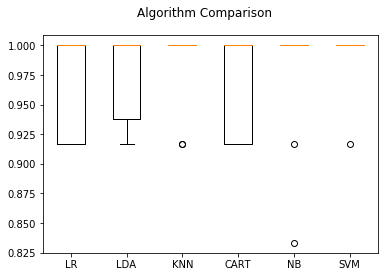

In [35]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Make prediction

In [43]:
# Make predictions on validation dataset
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

      micro avg       0.90      0.90      0.90        30
      macro avg       0.92      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30



### Here you can se how I performed all the steps if we have cleaned data because this all the procedure doesn't include cleaning or prepocessing part.<br> And such that we can find confusion matrics and classification report for all the algorithms

## Thank You 